# Crazy Taxi Data Exploration and Acquisition
Here we will explore the data sets obtained from http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml. This is data collected by the Taxi & Limo Commission on New York City taxis. 

There are three types of taxis in NYC. Yellow: these are your usual yellow taxis and are not restricted to pickup customers in any area. Green: these are called Boro Taxis and primarily service everything outside of downtown Manhattan and are not allowed to pick up in the Manhattan exclusionary zone. FHV (For-Hire-Vehicle): these are prearranged taxis all around NY through approved third party dispatchers.

Here is a map of the zones:
![Map of zones](map_service_area_map_thumbnail.jpg)
*Yellow area is the Manhatten exclusioary zone, green area is the area where both yellow and green taxis can pick up and drop off.(http://www.nyc.gov/html/tlc/html/passenger/shl_passenger.shtml)*

## Loading the Data into pandas and Cleaning

In [41]:
import pandas as pd

yellow_data = pd.read_csv('TaxiData/yellow_tripdata_2016-06.csv')
green_data = pd.read_csv('TaxiData/green_tripdata_2016-06.csv')

In [42]:
yellow_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76


In [43]:
green_data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-06-01 02:46:38,2016-06-01 03:06:40,N,1,-73.930580,40.695179,-74.000053,40.729046,1,...,19.5,0.5,0.5,6.24,0.0,NaN,0.3,27.04,1,1.0
1,2,2016-06-01 02:55:26,2016-06-01 03:06:52,N,1,-73.946930,40.792553,-73.951569,40.825161,1,...,11.5,0.5,0.5,2.56,0.0,NaN,0.3,15.36,1,1.0
2,2,2016-06-01 02:50:36,2016-06-01 03:08:39,N,1,-73.944534,40.823956,-73.994659,40.750423,1,...,23.5,0.5,0.5,2.00,0.0,NaN,0.3,26.80,1,1.0
3,2,2016-06-01 02:57:04,2016-06-01 03:07:52,N,1,-73.952209,40.823872,-73.914360,40.814697,1,...,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
4,2,2016-06-01 02:52:03,2016-06-01 03:08:12,N,1,-73.957977,40.717827,-73.954018,40.655121,3,...,16.5,0.5,0.5,0.00,0.0,NaN,0.3,17.80,1,1.0


Now that the data is added, any null values for pickup and dropoff location must be removed.

In [44]:
yellow_count_old = len(yellow_data.index)
green_count_old = len(green_data.index)

yellow_loc_lbls = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
green_loc_lbls = ['Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude']

yellow_data.dropna(subset=yellow_loc_lbls, inplace = True)
yellow_data.dropna(subset=['trip_distance'], inplace = True)

green_data.dropna(subset=green_loc_lbls, inplace = True)
green_data.dropna(subset=['Trip_distance'],inplace = True)

yellow_count_new = len(yellow_data.index)
green_count_new = len(green_data.index)
print("{0} rows removed from yellow data.".format(yellow_count_old-yellow_count_new))
print("{0} rows removed from green data.".format(green_count_old-green_count_new))

0 rows removed from yellow data.
0 rows removed from green data.


The clean data is explored for basic information

In [45]:
yellow_data.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07
mean,1.529817e+00,1.657273e+00,3.044006e+00,-7.305081e+01,4.024282e+01,1.043880e+00,-7.312388e+01,4.028391e+01,1.349718e+00,1.350708e+01,3.407188e-01,4.973046e-01,1.842121e+00,3.402089e-01,2.996818e-01,1.683016e+01
std,4.991102e-01,1.302489e+00,2.183019e+01,8.208047e+00,4.521673e+00,5.660610e-01,7.880313e+00,4.341196e+00,4.944984e-01,2.755358e+02,5.339716e-01,4.451916e-02,2.713585e+00,1.719710e+00,1.358086e-02,2.758608e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.181863e+02,0.000000e+00,1.000000e+00,-1.181863e+02,0.000000e+00,1.000000e+00,-4.500000e+02,-4.123000e+01,-2.700000e+00,-6.770000e+01,-1.250000e+01,-3.000000e-01,-4.508000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399178e+01,4.073653e+01,1.000000e+00,-7.399123e+01,4.073492e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.800000e+00
50%,2.000000e+00,1.000000e+00,1.710000e+00,-7.398135e+01,4.075358e+01,1.000000e+00,-7.397935e+01,4.075412e+01,1.000000e+00,1.000000e+01,0.000000e+00,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.230000e+01
75%,2.000000e+00,2.000000e+00,3.230000e+00,-7.396617e+01,4.076831e+01,1.000000e+00,-7.396202e+01,4.076954e+01,2.000000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.836000e+01
max,2.000000e+00,9.000000e+00,7.173270e+04,0.000000e+00,6.409648e+01,9.900000e+01,1.062469e+02,6.004071e+01,5.000000e+00,6.285447e+05,5.979200e+02,6.035000e+01,8.548500e+02,9.700000e+02,1.164000e+01,6.290338e+05


In [46]:
green_data.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,1.404726e+06,0.0,1.404726e+06,1.404726e+06,1.404726e+06,1.404724e+06
mean,1.795140e+00,1.091790e+00,-7.382591e+01,4.068546e+01,-7.385015e+01,4.069769e+01,1.358612e+00,2.879364e+00,1.250718e+01,3.502088e-01,4.868255e-01,1.307438e+00,1.190993e-01,NaN,2.921007e-01,1.508798e+01,1.515029e+00,1.021310e+00
std,4.035993e-01,5.990534e-01,2.863031e+00,1.578683e+00,2.509123e+00,1.383819e+00,1.026833e+00,2.990728e+00,1.069113e+01,3.857585e-01,8.534602e-02,2.909235e+00,9.104712e-01,NaN,5.122782e-02,1.223701e+01,5.241456e-01,1.444165e-01
min,1.000000e+00,1.000000e+00,-7.591609e+01,0.000000e+00,-7.591550e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.990000e+02,-4.500000e+00,-5.000000e-01,-1.320000e+01,-5.540000e+00,NaN,-3.000000e-01,-4.990000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.396138e+01,4.069402e+01,-7.396924e+01,4.069503e+01,1.000000e+00,1.070000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.190000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394639e+01,4.074594e+01,-7.394553e+01,4.074610e+01,1.000000e+00,1.900000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391862e+01,4.080157e+01,-7.391144e+01,4.078910e+01,1.000000e+00,3.600000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.232437e+01,0.000000e+00,4.232430e+01,9.000000e+00,2.681900e+02,3.347500e+03,4.500000e+00,5.000000e-01,3.000800e+02,9.800000e+01,NaN,3.000000e-01,3.349300e+03,5.000000e+00,2.000000e+00


For this project, the data was chosen from June 2016. This is the most recent data set that the New York City Taxi and Limo Comission used degrees for its pickup and dropoff locations. More recent data uses UTM, which requires conversion using GIS software. To keep the focus on data science, the June 2016 data was used. In addition to this, the conversion inculdes errors in calculation, so the degree data is also more accurate. Lasty, the FHV data does not include any pickup or dropoff location, so it is not useable for our purposes.

#### A bit more clean up
There are a few outliers on the coordinate data such as longitude/latitude 0 and negative values where there shouldn't be. Hopefully this cleans up for future use.


In [47]:
#yellow: -74 <= long <= -73.7  40.5 <= lat <= 43
#green:

#positive amounts

## Some visualization
Here we are going to visulaize the data and see if we can notice any patterns.

### Correlation Matrix and Heatmap

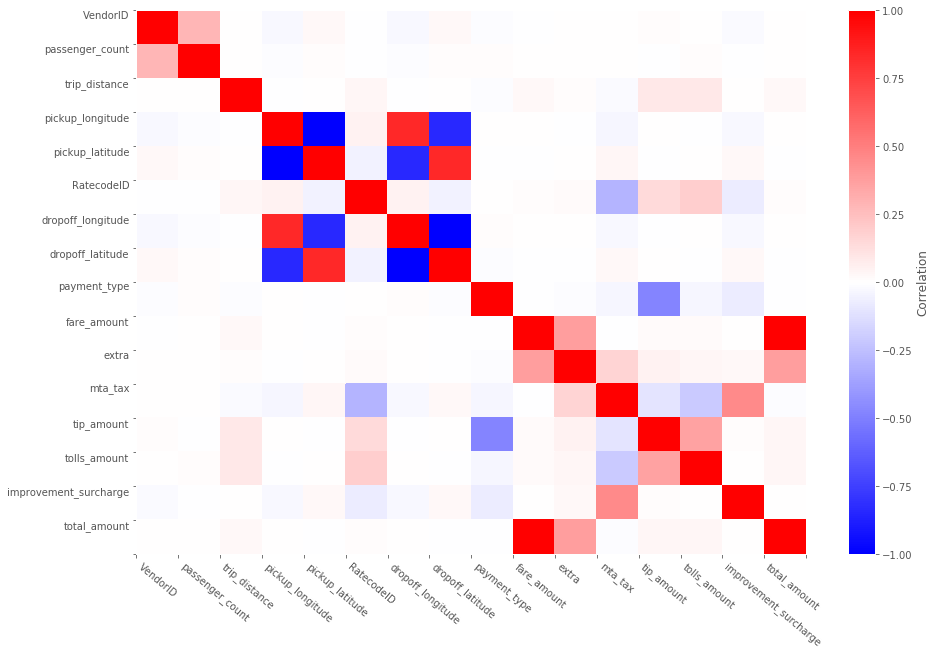

In [48]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (15, 10)

fig, ax = plt.subplots()

corr_mat = yellow_data.corr()

heatmap = ax.pcolor(corr_mat, cmap='bwr', vmin=-1, vmax=1)
ax.set_xticks(np.arange(corr_mat.shape[0] +.5));
ax.set_yticks(np.arange(corr_mat.shape[1] +.5));
ax.invert_yaxis()

#labels
col_lbl = corr_mat.columns
row_lbl = corr_mat.index
ax.set_xticklabels(col_lbl, rotation=-40,  ha='left');
ax.set_yticklabels(row_lbl, va='top');

cbar = plt.colorbar(heatmap)
cbar.set_label('Correlation')

Nothing of any particular interest. maybe scaling will help more.

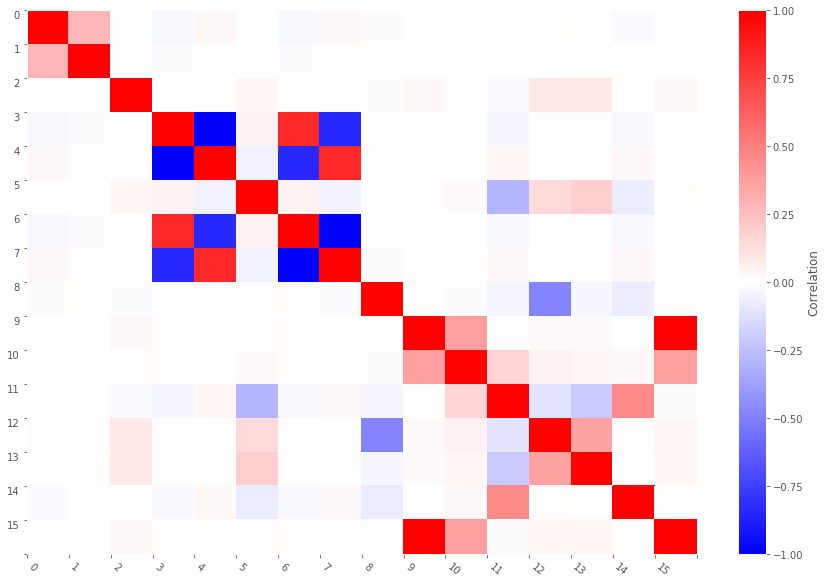

In [49]:
from sklearn.preprocessing import scale

fig, ax = plt.subplots()

norm_yellow = pd.DataFrame(scale(yellow_data._get_numeric_data()))
corr_mat = norm_yellow.corr()

heatmap = ax.pcolor(corr_mat, cmap='bwr', vmin=-1, vmax=1)
ax.set_xticks(np.arange(corr_mat.shape[0] +.5));
ax.set_yticks(np.arange(corr_mat.shape[1] +.5));
ax.invert_yaxis()

#labels
col_lbl = corr_mat.columns
row_lbl = corr_mat.index
ax.set_xticklabels(col_lbl, rotation=-40,  ha='left');
ax.set_yticklabels(row_lbl, va='top');

cbar = plt.colorbar(heatmap)
cbar.set_label('Correlation')

Same song.. We may as well look at the green taxi data just to make sure.

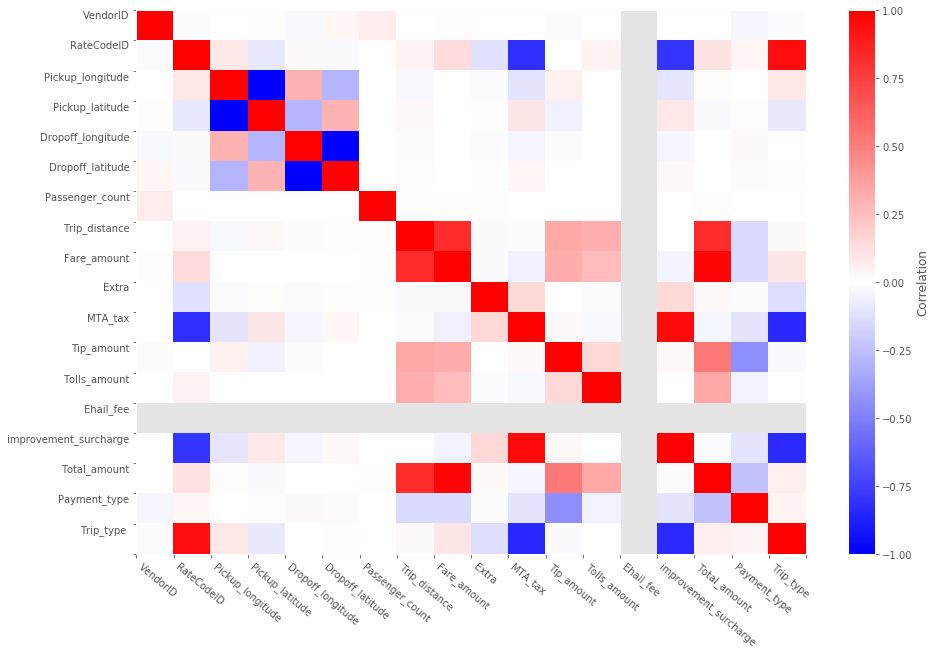

In [50]:
fig, ax = plt.subplots()

corr_mat = green_data.corr()

heatmap = ax.pcolor(corr_mat, cmap='bwr', vmin=-1, vmax=1)
ax.set_xticks(np.arange(corr_mat.shape[0] +.5));
ax.set_yticks(np.arange(corr_mat.shape[1] +.5));
ax.invert_yaxis()

#labels
col_lbl = corr_mat.columns
row_lbl = corr_mat.index
ax.set_xticklabels(col_lbl, rotation=-40,  ha='left');
ax.set_yticklabels(row_lbl, va='top');

cbar = plt.colorbar(heatmap)
cbar.set_label('Correlation')

### Geo Plot

### Geo Plot Heatmap